Import the standard libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the MNIST data from Keras

In [0]:
from tensorflow.keras.datasets import mnist

In [3]:
#The MNIST dataset consists of 60000 training images and 10000 test images. Size of an image is 28X28 and the dataset is loaded as follows
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#Dimensions of training data
x_train.shape

(60000, 28, 28)

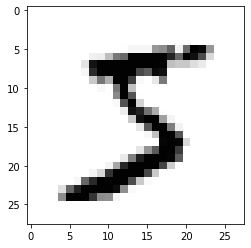

In [5]:
#To show an example image from the dataset
single_image = x_train[0]
plt.imshow(single_image,cmap='Greys')

In [6]:
"""Check the output labels of training data. These are numerical outputs for each image, so the model may end up assuming
that it is a numerical training problem e.g. regression problem and it would start predicting values like 5.5, 0.1 etc.
To overcome this and to let the model behave to predict categorical outputs, one hot encoding is needed."""
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

One hot encoding for output

In [0]:
from tensorflow.keras.utils import to_categorical

In [9]:
#Original dimensions of y_train
y_train.shape

(60000,)

In [10]:
#Convert one-hot encoding using 'to_categorical' and check its dimensions
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [11]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
#Checking the output for first image, there is a '1' at index 5 of the output, suggesting the digit to be '5'
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#Now one hot encoding is done both for training and testing data. The num_classes can also be explicitly mentioned.
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

Scale the data

In [0]:
#The values of training and testing images are fixed i.e. ranging from 0 to 255. So, instead of using pre-defined scalers such as MinMaxScaler, 
#the pixel values can be simply scaled between range 0 to 1 as follows:
x_train = x_train/255
x_test = x_test/255

Reshaping the data to add 'color component' dimension

In [0]:
#(num_images, width, height, no. of color components)
x_train = x_train.reshape(60000,28,28,1) 
x_test = x_test.reshape(10000,28,28,1)

Create the model

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

Add layers to the model

In [0]:
#The first layer of a CNN is a convolution layer. 'input_shape' parameter is fixed, while others can be changed.
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#convolution layer is followed by pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#flatten the 2D output to 1D
model.add(Flatten())

#fully connected layer at the end
model.add(Dense(128,activation='relu'))

#output layer - number of neurons is fixed i.e. 10 for multi-class classification as there are 10 classes (0-9). 
#Use activation function = softmax
model.add(Dense(10,activation='softmax'))

Compile the model

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


Prevent overfitting using EarlyStopping

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
#the val_loss is monitored and if starts to increase then training is stopped. Patience is the no. of epochs to execute before actually stopping
early_stop = EarlyStopping(monitor='val_loss',patience=2,mode='min')

Training

In [23]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1410 - accuracy: 0.9578 - val_loss: 0.0534 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0427 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0397 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0437 - val_accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0383 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0548 -

Model Evaluation

In [24]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140983,0.957850,0.053434,0.9831
1,0.046150,0.985800,0.042721,0.9857
2,0.029741,0.990417,0.039718,0.9858
3,0.019385,0.994183,0.043712,0.9866
4,0.013535,0.995317,0.036573,0.9879
5,0.010640,0.996633,0.038323,0.9888
6,0.008213,0.997133,0.054777,0.9852


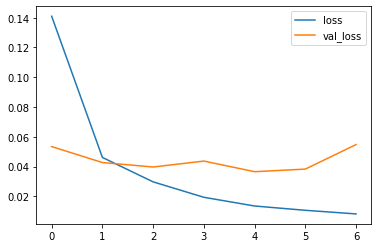

In [25]:
metrics[['loss','val_loss']].plot()

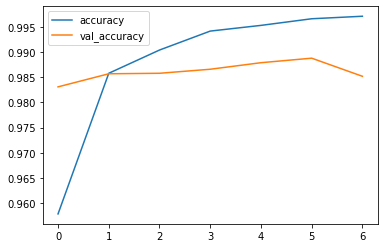

In [27]:
metrics[['accuracy','val_accuracy']].plot()

In [28]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0548 - accuracy: 0.9852


[0.05477727949619293, 0.9851999878883362]

In [0]:
#confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
#predict for test data
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.94      1.00      0.97       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [32]:
print(confusion_matrix(y_test,predictions))

[[ 976    0    1    0    0    1    1    1    0    0]
 [   2 1126    2    0    0    1    2    0    2    0]
 [   2    1 1025    0    0    0    1    2    1    0]
 [   0    0    7  977    0   25    0    0    1    0]
 [   0    0    2    0  969    0    1    0    0   10]
 [   0    0    1    2    0  888    1    0    0    0]
 [   3    2    0    1    1    5  946    0    0    0]
 [   0    1    6    1    0    0    0 1012    3    5]
 [   3    0    4    1    0    9    1    2  949    5]
 [   2    0    0    1    6   12    0    3    1  984]]


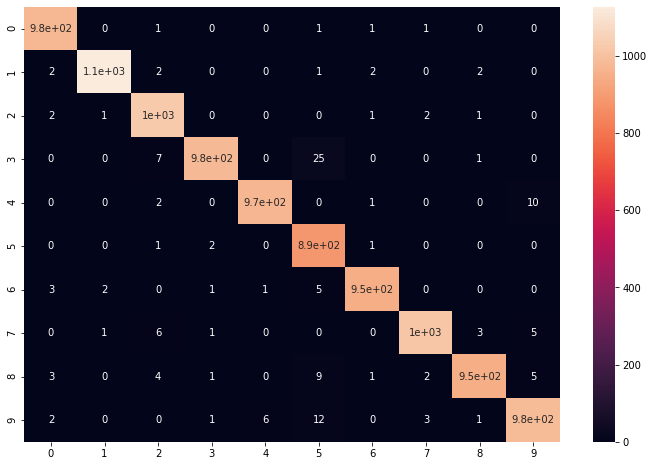

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

Predict for a single image

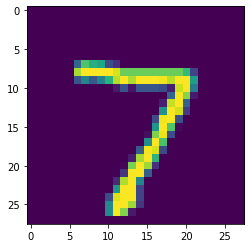

In [34]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [35]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])